<a href="https://colab.research.google.com/github/TreeLiquid/Intro-to-ML/blob/main/4105_HW2_Shigapov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #Normilization
mScaler = preprocessing.StandardScaler() #Standardizer

Pre-Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Obtain file data
filepath = '/content/drive/My Drive/Fall-2023/Intro-to-ML/Datasets/Housing.csv'
HD = pd.DataFrame(pd.read_csv(filepath))
HD.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#Null Checking
HD.isnull().sum()*100/HD.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [ ]:
#Converting True/False to 1/0
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Map Func (I am not converting furnishing status as the HW doesn't require me to)
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

HD[varlist] = HD[varlist].apply(binary_map)
HD.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Problem 1A

In [ ]:
#Training & Test Set Setup + Feature scaling
HD_train, HD_test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100)

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
HD_train = HD_train[num_vars]
HD_test = HD_test[num_vars]
HD_train.head()

,area,bedrooms,bathrooms,stories,parking,price
22,8050,3,1,1,1,8645000
41,6360,3,2,4,0,7840000
91,6750,2,1,1,2,6419000
118,6420,3,1,1,0,5950000
472,3630,4,1,2,3,3010000


In [ ]:
#Parameters
theta6 = np.zeros(6)
theta12 = np.zeros(12)

In [ ]:
#Training Set
y_train = HD_train.pop('price')
y_train = HD_train.values[:,0]
m = len(y_train)
x_train = HD_train
#Validation Sets
y_val = HD_test.pop('price')
y_val = HD_test.values[:,0]
x_val = HD_test
#x_val.head()

In [ ]:
#Grad Decsent
def gradient_descent(x_train, x_val, y_train, y_val, theta, alpha, itr):
  train_losses = []
  val_losses = []

  for iteration in range(itr):
    gradients = 2/m * x_train.T.dot(x_train.dot(theta) - y_train)
    theta = theta - alpha * gradients

    train_loss = (1/len(x_train)) * np.sum(np.square(x_train.dot(theta) - y_train))
    val_loss = (1/len(x_val)) * np.sum(np.square(x_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

  return theta, train_losses, val_losses

In [ ]:
#Training and Validation Losses for 1A
itr = 1000
alpha = 0.001
x_train_a = np.c_[np.ones((len(x_train), 1)), x_train]
x_val_a = np.c_[np.ones((len(x_val), 1)), x_val]

theta6, train_losses, val_losses = gradient_descent(x_train_a, x_val_a, y_train, y_val, theta6, alpha, itr)

<ipython-input-532-a049e549e1de>:10: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(x_train.dot(theta) - y_train))
<ipython-input-532-a049e549e1de>:11: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(x_val)) * np.sum(np.square(x_val.dot(theta) - y_val))


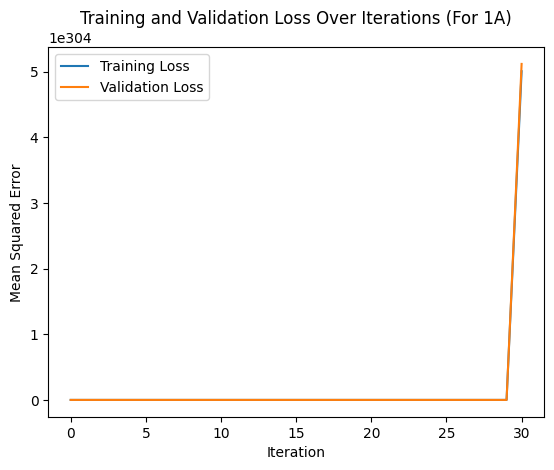

nan


In [ ]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 1A)")
plt.show()
print(train_losses[-1])

Problem 1b

In [ ]:
#Organization
HD_train, HD_test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100)
#mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
HD = HD[num_vars]
HD_train = HD_train[num_vars]
HD_test = HD_test[num_vars]
HD_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,8050,3,1,1,1,1,1,0,1,1,0,8645000
41,6360,3,2,4,1,0,0,0,1,0,1,7840000
91,6750,2,1,1,1,1,1,0,0,2,1,6419000
118,6420,3,1,1,1,0,1,0,1,0,1,5950000
472,3630,4,1,2,1,0,0,0,0,3,0,3010000


In [ ]:
#Training Set
y_train = HD_train.pop('price')
x_train = HD_train
#x_train_1b.head()

#Validation Sets
y_val = HD_test.pop('price')
x_val = HD_test
x_val.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,2880,3,1,2,1,0,0,0,0,0,1
54,6000,3,2,2,1,1,0,0,1,1,0
171,10269,3,1,1,1,0,0,0,0,1,1
244,5320,3,1,2,1,1,1,0,0,0,1
268,4950,4,1,2,1,0,0,0,1,0,0


In [ ]:
#Training and Validation Losses for 1B
m = len(x_train)
itr = 10000
a = 0.001

x_train = np.c_[np.ones((len(x_train), 1)), x_train]
x_val = np.c_[np.ones((len(x_val), 1)), x_val]

theta, train_losses, val_losses = gradient_descent(x_train, x_val, y_train, y_val, theta12, alpha, itr)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-532-a049e549e1de>:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gradients


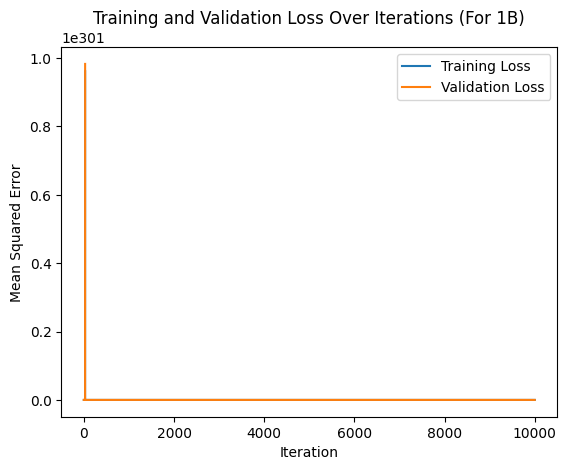

0.0


In [ ]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 1B)")
plt.show()
print(train_losses[-1])

Question 2A

In [ ]:
#Preprocessing: Normilaztion (0-1) and Standardization (mean removal)
HD_train, HD_test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100)

Q2A - Normalization

In [ ]:
#Norming
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
HD_train = HD_train[num_vars]
HD_train_Scaled = scaler.fit(HD_train)
HD_test = HD_test[num_vars]
HD_test_Scaled = scaler.fit_transform(HD_test)

In [ ]:
#Delaring Sets & Removing "extra" Data
#Training Set [Normalizing]
y_train = HD_train.pop('price')
x_train = HD_train
x_train.head()

,area,bedrooms,bathrooms,stories,parking
22,8050,3,1,1,1
41,6360,3,2,4,0
91,6750,2,1,1,2
118,6420,3,1,1,0
472,3630,4,1,2,3


In [ ]:
#Validation Sets [Normalizing]
y_val = HD_test.pop('price')
x_val = HD_test
x_train.head()

,area,bedrooms,bathrooms,stories,parking
22,8050,3,1,1,1
41,6360,3,2,4,0
91,6750,2,1,1,2
118,6420,3,1,1,0
472,3630,4,1,2,3


In [ ]:
a = 0.001
itr = 1000

x_train = np.c_[np.ones((len(x_train), 1)), x_train]
x_val = np.c_[np.ones((len(x_val), 1)), x_val]
theta, train_losses, val_losses = gradient_descent(x_train, x_val, y_train, y_val, theta6, alpha, itr)


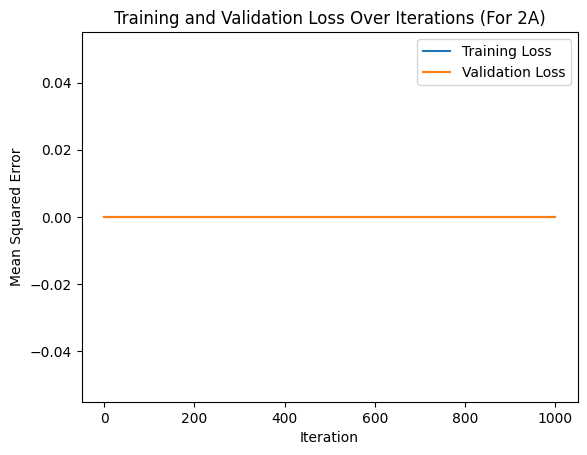

0.0


In [ ]:
#Training and validation losses for both training and validation set based on input standardization and input normalization
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 2A)")
plt.show()
print(train_losses[-1])

Q2A - Standardization

In [ ]:
#Standardizing
HD_train, HD_test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
HD_train = HD_train[num_vars]
HD_train_Scaled = mScaler.fit(HD_train)
HD_test = HD_test[num_vars]
HD_test_Scaled = mScaler.fit(HD_test)

In [ ]:
#Delaring Sets & Removing "extra" Data
#Training Set [Standardizing]
y_train = HD_train.pop('price')
x_train = HD_train
x_train.head()

,area,bedrooms,bathrooms,stories,parking
22,8050,3,1,1,1
41,6360,3,2,4,0
91,6750,2,1,1,2
118,6420,3,1,1,0
472,3630,4,1,2,3


In [ ]:
#Validation Set [Standardizing]
y_val = HD_test.pop('price')
x_val = HD_test


In [ ]:
a = 1000
itr = 0.01

In [ ]:
#Training and Validation Losses for 2A
x_train = np.c_[np.ones((len(x_train), 1)), x_train]
x_val = np.c_[np.ones((len(x_val), 1)), x_val]



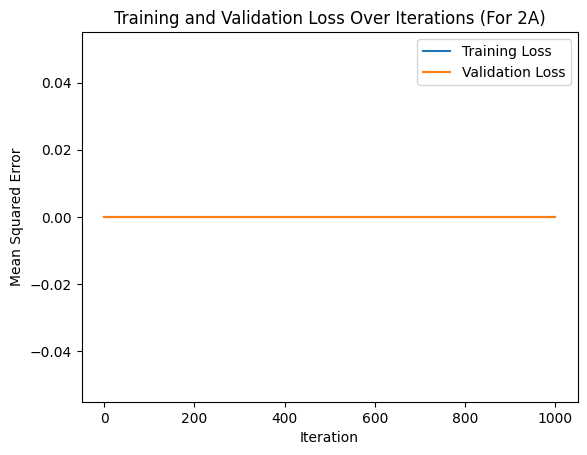

0.0


In [ ]:
#Training and validation losses for both training and validation set based on input standardization and input normalization [Stando]
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 2A)")
plt.show()
print(train_losses[-1])

Question 2B

Q2B - Normalization

In [ ]:
#Norming
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
HD_train = scaler.fit_transform(HD_train_2B_N[num_vars_2B_N])
HD_train_2B_N.head()

NameError: ignored

In [ ]:
#Delaring Sets & Removing "extra" Data
#Training Set [Normalizing]
y_train_2B_N = HD_train.pop('price')
x_train_2B_N = HD_train
x_train_2B_N.head()

In [ ]:
#Validation Sets [Normalizing]
y_val = HD_test.pop('price')
x_val = HD_test


In [ ]:
alpha =
itr =

In [ ]:
#Training and Validation Losses for 2B [Norm]
x_train_2B_N = np.c_[np.ones((len(x_train_2B_N), 1)), x_train_2B_N]
x_val_2B_N = np.c_[np.ones((len(x_val_2B_N), 1)), x_val_2B_N]



In [ ]:
plt.plot(range(1,itr + 1), train_losses, label="Training Loss")
plt.plot(range(1, itr + 1), val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 1B)")
plt.show()
print(train_losses[-1])

Q2B - Standardization

In [ ]:
#Stando
num_vars_2B_S = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
HD_train_2B_S[num_vars_2B_N] = scaler.fit_transform(HD_train_2B_S[num_vars_2B_S])
HD_train_2B_S.head()

In [ ]:
#Delaring Sets & Removing "extra" Data
#Training Set [Stando]
y_train = HD_train.pop('price')
x_train = HD_train


In [ ]:
#Validation Sets [Stando]
y_val = HD_test.pop('price')
x_val = HD_test

In [ ]:
alpha =
itr =

In [ ]:
#Training and Validation Losses for 2B [Stando]
x_train_2B_S = np.c_[np.ones((len(x_train_2B_S), 1)), x_train_2B_S]
x_val_2B_S = np.c_[np.ones((len(x_val_2B_S), 1)), x_val_2B_S]

train_losses_2B_S = []
val_losses_2B_S = []

for iteration in range(itr_2B_S):
    gradients_2B_S = 2/m * x_train_2B_S.T.dot(x_train_2S_N.dot(theta_2B_S) - y_train_2B_S)
    theta_2B_S -= a_2B_S * gradients_2B_S

    train_loss_2B_S = (1/m) * np.sum(np.square(x_train_2B_S.dot(theta_2B_S) - y_train_2B_S))
    val_loss_2B_S = (1/len(x_val_2B_S)) * np.sum(np.square(x_val_2B_S.dot(theta_2B_S) - y_val_2B_S))

    train_losses_2B_S.append(train_loss_2B_S)
    val_losses_2B_S.append(val_loss_2B_S)

In [ ]:
plt.plot(range(1,itr + 1), train_losses, label="Training Loss")
plt.plot(range(1, itr + 1), val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 1B)")
plt.show()
print(train_losses[-1])

Question 3A

In [ ]:
#